In [1]:
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.6.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1226515506394854661
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22712156160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1615938724774066311
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6"
]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Data

$ y = x^3 + 50,000 $

In [4]:
X = []
Y = []

for i in range(50):
    X.append(i)
    Y.append(i**3 + 50000)
    
    X.append(-i)
    Y.append(-i**3 + 50000)
    
    X.append(i + 0.5)
    Y.append((i + 0.5)**3 + 50000)
    
    X.append(-i - 0.5)
    Y.append((-i - 0.5)**3 + 50000)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

## Model

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(10, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dense(10, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dense(10, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mean_absolute_error",
              optimizer="Adam",
              metrics=["mean_absolute_error"])

In [7]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 58923.7070 - mean_absolute_error: 58923.7070
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 58923.1289 - mean_absolute_error: 58923.1289
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 58922.4766 - mean_absolute_error: 58922.4766
Epoch 4/100
14/14 [==============================] - 0s 1ms/step - loss: 58921.6406 - mean_absolute_error: 58921.6406
Epoch 5/100
14/14 [==============================] - 0s 1ms/step - loss: 58920.6016 - mean_absolute_error: 58920.6016
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 58919.2422 - mean_absolute_error: 58919.2422
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 58917.5586 - mean_absolute_error: 58917.5547
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 58915.0977 - mean_absolute_error: 58915.0977
Epoch 9/100
14/14 [==============================] - 0s 

14/14 [==============================] - 0s 1ms/step - loss: 25993.2793 - mean_absolute_error: 25993.2793
Epoch 70/100
14/14 [==============================] - 0s 2ms/step - loss: 25985.7441 - mean_absolute_error: 25985.7441
Epoch 71/100
14/14 [==============================] - 0s 2ms/step - loss: 25995.0957 - mean_absolute_error: 25995.0957
Epoch 72/100
14/14 [==============================] - 0s 2ms/step - loss: 25980.9199 - mean_absolute_error: 25980.9199
Epoch 73/100
14/14 [==============================] - 0s 2ms/step - loss: 25976.6816 - mean_absolute_error: 25976.6816
Epoch 74/100
14/14 [==============================] - 0s 2ms/step - loss: 25974.9902 - mean_absolute_error: 25974.9902
Epoch 75/100
14/14 [==============================] - 0s 2ms/step - loss: 25979.2051 - mean_absolute_error: 25979.2051
Epoch 76/100
14/14 [==============================] - 0s 2ms/step - loss: 25965.7109 - mean_absolute_error: 25965.7148
Epoch 77/100
14/14 [==============================] - 0s 2ms/

In [8]:
Y_hat = model.predict(X)

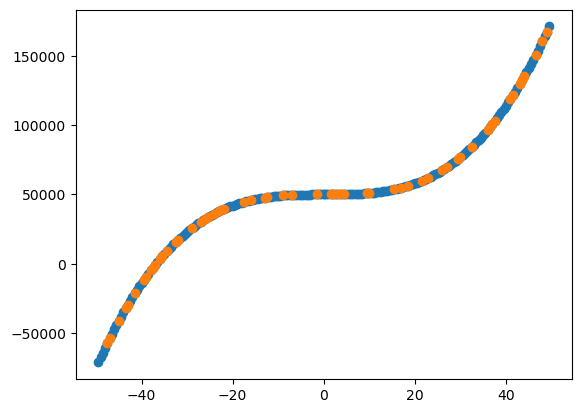

In [9]:
plt.scatter(X, Y)
plt.scatter(X_test, y_test)
plt.show()

In [10]:
model.predict([1,2,3,4,5,6,7,8,9,10])

array([[ 5926.748],
       [ 8688.265],
       [11448.967],
       [14214.928],
       [16974.254],
       [19729.637],
       [22499.88 ],
       [25250.936],
       [28025.826],
       [30785.082]], dtype=float32)